In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset
from tensorflow.keras.utils import to_categorical




In [ ]:
a,b=load_data_fashion_mnist(30)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid poten

In [ ]:
for x,y in a:
  print(y)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


tensor([6, 3, 4, 9, 0, 6, 4, 0, 9, 6, 2, 4, 7, 9, 7, 0, 5, 7, 7, 4, 3, 9, 8, 7,
        1, 7, 6, 3, 1, 8])
tensor([6, 1, 9, 5, 0, 7, 0, 1, 0, 4, 4, 1, 0, 3, 3, 2, 2, 5, 7, 3, 2, 9, 0, 9,
        4, 6, 6, 6, 5, 6])
tensor([5, 8, 3, 4, 8, 4, 6, 5, 2, 0, 3, 1, 5, 4, 9, 0, 8, 2, 8, 0, 0, 7, 7, 0,
        1, 7, 8, 0, 6, 1])
tensor([6, 7, 0, 5, 7, 3, 3, 1, 3, 9, 2, 1, 5, 6, 7, 8, 0, 4, 3, 3, 3, 3, 8, 3,
        0, 3, 1, 7, 7, 6])
tensor([5, 1, 2, 7, 0, 1, 0, 0, 0, 0, 2, 8, 7, 9, 0, 8, 3, 8, 3, 4, 0, 6, 6, 8,
        8, 0, 5, 8, 6, 9])
tensor([0, 8, 7, 9, 3, 6, 7, 7, 1, 3, 2, 2, 6, 6, 9, 6, 6, 1, 8, 3, 1, 4, 9, 2,
        5, 1, 2, 9, 6, 2])
tensor([5, 0, 8, 1, 7, 6, 9, 0, 1, 9, 6, 0, 9, 4, 9, 0, 2, 6, 7, 4, 4, 7, 6, 7,
        4, 4, 9, 8, 3, 1])
tensor([6, 9, 7, 1, 0, 4, 1, 8, 2, 4, 4, 9, 0, 6, 5, 6, 4, 6, 6, 8, 8, 7, 6, 3,
        9, 2, 6, 1, 5, 4])
tensor([0, 8, 6, 2, 8, 8, 4, 5, 8, 2, 3, 7, 6, 4, 2, 2, 7, 5, 8, 6, 4, 8, 2, 0,
        8, 6, 2, 8, 3, 5])
tensor([0, 8, 8, 9, 6, 6, 8, 3, 5, 9,

In [ ]:
def load_data_fashion_mnist(batch_size, resize=None): 
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root="../data",
                                                    train=True,
                                                    transform=trans,
                                                    download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root="../data",
                                                   train=False,
                                                   transform=trans,
                                                   download=True)

    return (DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=4),
            DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=4))


In [ ]:
a,b=load_data_fashion_mnist(30,False)
for x,y in a:
  print(len(y))
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


30


In [ ]:


def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc


In [ ]:

class LinearRegression():
  def __init__(self):
    from torch import nn
    self.model = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
    def init_weights(m):
      if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
    self.model.apply(init_weights)
    self.lossHis=[]
    #Model

    
    
  def train(self,batch,lr,num_epocs):
    trainData,_=load_data_fashion_mnist(30,False)
    trainer=torch.optim.SGD(self.model.parameters(), lr=lr)
    self.model.train()
    #SGD
    for epoc in range(num_epocs):
      for x,y in trainData:
        y_hat=self.model(x)
        loss=nn.CrossEntropyLoss()(y_hat,y)
        trainer.zero_grad()
        
        loss.backward()
        trainer.step()
        train_loss=self.accuracy(y_hat,y)
        self.lossHis.append(float(train_loss))
        print(f'epoch {epoc + 1}, Accuracy {float(train_loss/len(y)):f}')
      
      
  def loss(self,y_hat,y):
    return -torch.log(y_hat[range(len(y_hat)), y])
  def accuracy(self,y_hat, y):
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]
model=LinearRegression()
model.train(batch=4,lr=0.001,num_epocs=20)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Streaming output truncated to the last 5000 lines.
epoch 18, Accuracy 0.766667
epoch 18, Accuracy 0.833333
epoch 18, Accuracy 0.800000
epoch 18, Accuracy 0.766667
epoch 18, Accuracy 0.800000
epoch 18, Accuracy 0.733333
epoch 18, Accuracy 0.700000
epoch 18, Accuracy 0.866667
epoch 18, Accuracy 0.866667
epoch 18, Accuracy 0.833333
epoch 18, Accuracy 0.833333
epoch 18, Accuracy 0.833333
epoch 18, Accuracy 0.866667
epoch 18, Accuracy 0.733333
epoch 18, Accuracy 0.900000
epoch 18, Accuracy 0.900000
epoch 18, Accuracy 0.966667
epoch 18, Accuracy 0.733333
epoch 18, Accuracy 0.800000
epoch 18, Accuracy 0.800000
epoch 18, Accuracy 0.800000
epoch 18, Accuracy 0.933333
epoch 18, Accuracy 0.833333
epoch 18, Accuracy 0.800000
epoch 18, Accuracy 0.866667
epoch 18, Accuracy 0.766667
epoch 18, Accuracy 0.966667
epoch 18, Accuracy 0.833333
epoch 18, Accuracy 0.800000
epoch 18, Accuracy 0.800000
epoch 18, Accuracy 0.666667
epoch 18, Accuracy 0.900000
epoch 18, Accuracy 0.866667
epoch 18, Accuracy 0.8333

In [ ]:
model.lossHist=[x/30 for x in model.lossHis]

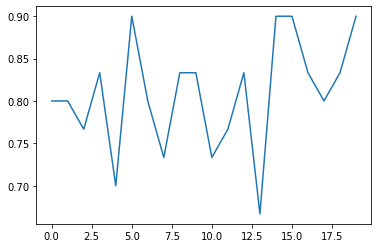

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.lossHist)
plt.show()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


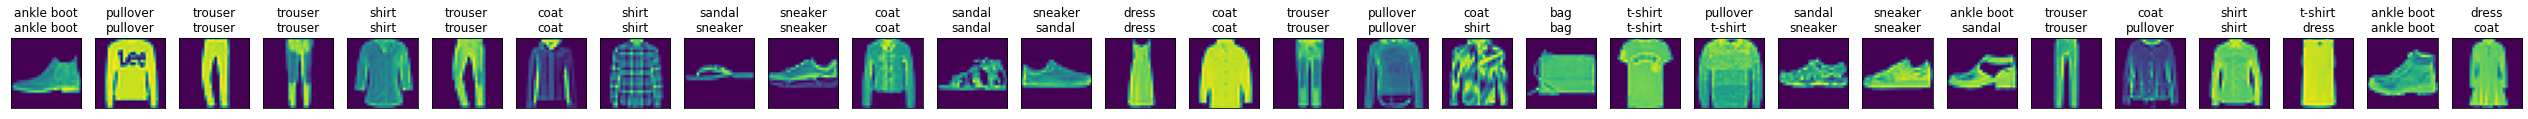

In [ ]:
def get_fashion_mnist_labels(labels):
    text_labels = [
        't-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt',
        'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        ax.imshow(img.numpy())
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes
def predict_ch3(net, test_iter, n=30): 
    for X, y in test_iter:
        break
    trues = get_fashion_mnist_labels(y)
    preds = get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    show_images(X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])
a,b=load_data_fashion_mnist(30,False)
predict_ch3(model.model, b)